# Final Project - Telecom Churn Forecast

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts

**Interconnect's services**

Interconnect mainly provides two types of services:
- Landline communication. The telephone can be connected to several lines simultaneously.
- Internet. The network can be set up via a telephone line (DSL, digital subscriber line) or through a fiber optic cable.

Some other services the company provides include:
- Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity)
- A dedicated technical support line (TechSupport)
- Cloud file storage and data backup (OnlineBackup)
- TV streaming (StreamingTV) and a movie directory (StreamingMovies)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

**Data Description**

The data consists of files obtained from different sources:
- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.
The contract information is valid as of February 1, 2020.

**Work Rough Plan**
- What is the problem?
 - Define the problem to estimate customer churn rate by several factors that make clients not continuing the service, and customized the package for customer needs
- Data Preparation
 - Collecting all data such as customer personal information, the service that customer used, customer and also the contract information
- Data Preprocessing
 - Checking the data for anomaly value such as missing value, duplicates, type of data, scaling, and convert data to suitable format
- Exploratory Data Analysis (EDA)
 - Visualization of data distribution, identify the outliers, and finding some correlations
- Feature Engineer
 - Make new features to develop model training, such as usage trends, customer lifetime value, and classified customers based on behavior.
- Model training and validation
 - Chose some models as baselines such as logistic regression, random forest, decision tree, KNN, LightGbm, CatBoost, XGBoost.
 - Hyperparameter will be used in several model so we can improvise the model
 - Train the model on the training data and validate its performance on the validation data.
- Result and Report
 - Interpreting all analysis results, such as the best model, the most important features or identified some problems
 - Report it to stakeholder as a form of presentations, or reports

## Literature Review

*This literature based on rough plan, it can be changed while in progress

**Model**
- Logistic Regression (https://www.researchoptimus.com/article/what-is-logistic-regression.php)

Logistic regression forecasts categorical results, including binomial and multinomial values of y. It’s a widely used statistical technique for forecasting binary classes and computes the likelihood of an event occurring or a decision being made. For example, a business might want to understand the probability of different demographics of guests accepting a promotional offer on their website (dependent variable). In this case, logistic regression would examine known characteristics of the guests, like if they’ve made other visits to the business’s website (independent variables) and what other websites they might have originated from. This would help the business develop their decision-making process regarding promotional content.

- Random Forest (https://machinelearningmastery.com/random-forest-for-time-series-forecasting/)

It is widely used for classification and regression predictive modeling problems with structured (tabular) data sets, e.g. data as it looks in a spreadsheet or database table.

Random Forest can also be used for time series forecasting, although it requires that the time series dataset be transformed into a supervised learning problem first. It also requires the use of a specialized technique for evaluating the model called walk-forward validation, as evaluating the model using k-fold cross validation would result in optimistically biased results.

- Support Vector Modelling (https://scialert.net/fulltext/?doi=jas.2010.950.958)

Recently, the Support Vector Machine (SVM) method, which was first suggested by Vapnik (1995), has recently been used in a range of applications such as in data mining, classification, regression and time series forecasting (Cao and Tay, 2001; Flake and Lawrence, 2002; Zhao et al., 2006). The ability of SVM to solve nonlinear regression estimation problems makes SVM successful in time series forecasting. It has become a hot topic of intensive study due to its successful application in classification and regression tasks.

- XGBoost (https://machinelearningmastery.com/xgboost-for-time-series-forecasting/)

XGBoost is an efficient implementation of gradient boosting for classification and regression problems.

It is both fast and efficient, performing well, if not the best, on a wide range of predictive modeling tasks and is a favorite among data science competition winners, such as those on Kaggle.

XGBoost can also be used for time series forecasting, although it requires that the time series dataset be transformed into a supervised learning problem first. It also requires the use of a specialized technique for evaluating the model called walk-forward validation, as evaluating the model using k-fold cross validation would result in optimistically biased results.

- Gradien Boosting (https://cienciadedatos.net/documentos/py39-forecasting-time-series-with-skforecast-xgboost-lightgbm-catboost.html

Gradient boosting models have gained popularity in the machine learning community due to their ability to achieve excellent results in a wide range of use cases, including both regression and classification. Although these models have traditionally been less common in forecasting, recent research has shown that they can be highly effective in this domain. Some of the key benefits of using gradient boosting models for forecasting include:

- The ease with which exogenous variables can be included in the model, in addition to autoregressive variables.
- The ability to capture non-linear relationships between variables.
- High scalability, allowing models to handle large volumes of data.
- Some implementations allow the inclusion of categorical variables without the need for one-hot coding.

## Initialization

In [12]:
# required libraries

# !pip install sidetable
# !pip3 install imblearn --user
# !pip install catboost

In [13]:
# common Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
from functools import reduce
from collections import defaultdict
from tqdm import tqdm

# machine learning
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, RocCurveDisplay, precision_score, recall_score, auc

## Data Overview

In [14]:
# load data
contract = pd.read_csv('final_provider/contract.csv', parse_dates=['BeginDate'])
internet = pd.read_csv('final_provider/internet.csv')
personal = pd.read_csv('final_provider/personal.csv')
phone = pd.read_csv('final_provider/phone.csv')


### Data Sample

In [15]:
# contract dataset sample
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


The columns included in the `contract` include:
- `CustomerID` : Unique code for each customer.
- `BeginDate` : the date when a customer starts the subscription.
- `EndDate` : when a customer stops the subscription.
- `Type` : contract type, whether monthly or yearly.
- `PaperlessBilling` : whether the bill is sent by email or mail.
- `PaymentMethod` : payment method; bank transfer, e-check, etc.
- `MonthlyCharges` : monthly fees charged.
- `TotalCharges` : total fees that the customer has paid during the subscription.

In [16]:
# internet dataset sample
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


The columns included in the `internet` include:
- `CustomerID` : Unique code for each customer who subscribes to the internet package.
- `InternetService` : Internet line type; fiber optic, and DSL (digital subscriber line).
- `DeviceProtection` : Antivirus software.
- `OnlineSecurity` : Internet security; malicious website blocker.
- `TechSupport` : Dedicated technical support line.
- `OnlineBackup` : Cloud storage for file and data backup.
- `StreamingTV` : TV streaming.
- `StreamingMovies` : Movie directory.

In [17]:
# personal dataset sample
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


The columns included in the `personal` include:
- `CustomerID` : Unique code for each customer.
- `Gender`
- `SeniorCitizen` : Whether the customer is of retirement age.
- `Partner` : Whether the customer has a partner.
- `Dependants` : Whether the customer has dependents.

In [18]:
# phone dataset sample
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


The columns included in the `phone` include:
- `CustomerID` : Unique code for each customer who subscribes to a phone line.
- `Multiplelines` : Whether the client subscribes to only one phone line or more.

In [19]:
# lowercase the title of the column
for i in [contract, internet, personal, phone]:
    i.columns = i.columns.str.strip().str.lower()

### Data Information

In [20]:
# information of contract dataset
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           7043 non-null   object        
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


In [21]:
# convert totalcharges to numeric
contract['totalcharges'] = pd.to_numeric(contract['totalcharges'], errors='coerce')

In [22]:
# information of internet dataset
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        5517 non-null   object
 1   internetservice   5517 non-null   object
 2   onlinesecurity    5517 non-null   object
 3   onlinebackup      5517 non-null   object
 4   deviceprotection  5517 non-null   object
 5   techsupport       5517 non-null   object
 6   streamingtv       5517 non-null   object
 7   streamingmovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [23]:
# information of personal dataset
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     7043 non-null   object
 1   gender         7043 non-null   object
 2   seniorcitizen  7043 non-null   int64 
 3   partner        7043 non-null   object
 4   dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [24]:
# information of phone dataset
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     6361 non-null   object
 1   multiplelines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


**Findings :**
- No missing values in all datasets
- Each datasets contain different number of columns and rows

**Data Description (Statistical)**

In [25]:
# statistical description of contract dataset
contract.describe()

,monthlycharges,totalcharges
count,7043.000000,7032.000000
mean,64.761692,2283.300441
std,30.090047,2266.771362
min,18.250000,18.800000
25%,35.500000,401.450000
50%,70.350000,1397.475000
75%,89.850000,3794.737500
max,118.750000,8684.800000


**Findings :**
- Each customer has an average bill around USD 64 per month
- The average of total bill that has been paid by customers in around USD 2283
- There was no anomaly value in dataset

## Data Pre-Processing

### Feature Engineering

- Add new column for customer whose stop the services
- Add new column for difference between enddate and begindate to knowing how long a customer has been using Interconnect's service based
- Use the last date of the data which is 2020-02-01 if the customer is still using the service

In [26]:
# add churn column based on enddate
contract['churn'] = (contract['enddate'] != 'No').astype('int')
contract

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [27]:
# force enddate column to datetime
contract['enddate'] = pd.to_datetime(contract['enddate'], errors='coerce')
contract['enddate'].dtype

dtype('<M8[ns]')

In [28]:
# enddate and begindate deviation
contract['totalmonths'] = np.floor((contract.enddate - contract.begindate)/np.timedelta64(1, 'M'))
contract['totalmonths'] = contract['totalmonths'].fillna(np.floor((pd.to_datetime('2020-02-01') - contract.begindate)/np.timedelta64(1, 'M')))
contract.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,totalmonths
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,1.0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0,34.0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,2.0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0,45.0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,2.0


### Dataset Merger

In [29]:
# merge all dataset

dataframes = [contract, internet, personal, phone]
telecom = reduce(lambda  left,right: pd.merge(left,right,on=['customerid'], how='outer'), dataframes)

telecom.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,totalmonths,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,1.0,...,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0,34.0,...,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,2.0,...,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0,45.0,...,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,2.0,...,No,No,No,No,No,Female,0,No,No,No


In [30]:
# telecom dataframe information
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7043 non-null   object        
 4   paperlessbilling  7043 non-null   object        
 5   paymentmethod     7043 non-null   object        
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   churn             7043 non-null   int32         
 9   totalmonths       7043 non-null   float64       
 10  internetservice   5517 non-null   object        
 11  onlinesecurity    5517 non-null   object        
 12  onlinebackup      5517 non-null   object        
 13  deviceprotection  5517 non-null   object        
 14  techsupport       5517 n

### Duplicate and Missing Values

In [31]:
# check the duplicates
telecom.duplicated().sum()

0

In [32]:
# check the missing value
telecom.stb.missing()

,missing,total,percent
enddate,5174,7043,73.463013
onlinesecurity,1526,7043,21.666903
internetservice,1526,7043,21.666903
streamingmovies,1526,7043,21.666903
streamingtv,1526,7043,21.666903
techsupport,1526,7043,21.666903
deviceprotection,1526,7043,21.666903
onlinebackup,1526,7043,21.666903
multiplelines,682,7043,9.683374
totalcharges,11,7043,0.156183


**Solution** :

Fill the missing value in some columns with `not_included`, to fill in customers that is not using internet or phone services.

In [33]:
# fill the missing value
miss_cols = ['onlinesecurity',
             'internetservice',
             'streamingmovies',
             'streamingtv',
             'techsupport',
             'deviceprotection',
             'onlinebackup',
             'multiplelines']

for col in miss_cols:
    telecom[col] = telecom[col].fillna('not_included')

telecom.stb.missing()

,missing,total,percent
enddate,5174,7043,73.463013
totalcharges,11,7043,0.156183
customerid,0,7043,0.000000
onlinebackup,0,7043,0.000000
dependents,0,7043,0.000000
partner,0,7043,0.000000
seniorcitizen,0,7043,0.000000
gender,0,7043,0.000000
streamingmovies,0,7043,0.000000
streamingtv,0,7043,0.000000


In [34]:
# check missing value in totalcharges column
telecom.loc[telecom['totalcharges'].isna()]

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,totalmonths,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,0.0,...,No,Yes,Yes,Yes,No,Female,0,Yes,Yes,not_included
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,NaN,0,0.0,...,not_included,not_included,not_included,not_included,not_included,Male,0,No,Yes,No
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,NaN,0,0.0,...,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,NaN,0,0.0,...,not_included,not_included,not_included,not_included,not_included,Male,0,Yes,Yes,Yes
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,NaN,0,0.0,...,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,not_included
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,NaN,0,0.0,...,not_included,not_included,not_included,not_included,not_included,Male,0,Yes,Yes,No
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,NaN,0,0.0,...,not_included,not_included,not_included,not_included,not_included,Male,0,Yes,Yes,Yes
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,NaN,0,0.0,...,not_included,not_included,not_included,not_included,not_included,Female,0,Yes,Yes,No
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,NaN,0,0.0,...,not_included,not_included,not_included,not_included,not_included,Male,0,Yes,Yes,No
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,NaN,0,0.0,...,Yes,Yes,Yes,Yes,No,Female,0,Yes,Yes,Yes


**Findings** :
- Missing values in `totalcharges` only happenned to new customers because it was their first month using the service

In [35]:
# check for customers who have only subscribed for one month
telecom.loc[telecom['totalmonths'] == 1]

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,totalmonths,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,1.0,...,Yes,No,No,No,No,Female,0,Yes,No,not_included
33,7310-EGVHZ,2020-01-01,NaT,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0,1.0,...,not_included,not_included,not_included,not_included,not_included,Male,0,No,No,No
34,3413-BMNZE,2020-01-01,NaT,Month-to-month,No,Bank transfer (automatic),45.25,45.25,0,1.0,...,No,No,No,No,No,Male,1,No,No,No
70,2273-QCKXA,2020-01-01,NaT,Month-to-month,No,Mailed check,49.05,49.05,0,1.0,...,No,No,Yes,No,No,Male,0,No,No,No
91,2424-WVHPL,2020-01-01,NaT,Month-to-month,No,Electronic check,74.70,74.70,0,1.0,...,No,No,Yes,No,No,Male,1,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6943,0032-PGELS,2019-10-01,2019-11-01,Month-to-month,No,Bank transfer (automatic),30.50,30.50,1,1.0,...,No,No,No,No,No,Female,0,Yes,Yes,not_included
6979,5351-QESIO,2020-01-01,NaT,Month-to-month,No,Mailed check,24.20,24.20,0,1.0,...,No,No,No,No,No,Male,0,No,Yes,not_included
7016,1471-GIQKQ,2020-01-01,NaT,Month-to-month,No,Electronic check,49.95,49.95,0,1.0,...,Yes,No,No,No,No,Female,0,No,No,No
7018,1122-JWTJW,2019-10-01,2019-11-01,Month-to-month,Yes,Mailed check,70.65,70.65,1,1.0,...,No,No,No,No,No,Male,0,Yes,Yes,No


**Findings** :
- We can see that there was no additional charge for customers who had subscribed only for a month, so we can fill the missing value in `totalcharges`

In [36]:
# fillna totalcharges column
telecom['totalcharges'].fillna(telecom[telecom['totalcharges'].isna()]['monthlycharges'], inplace=True)

# replace the 0 value in totalmonths to 1 and change the column type
telecom['totalmonths'] = telecom['totalmonths'].replace([0], 1).astype(int)

In [37]:
# double check the missing values are filled
telecom.stb.missing()

,missing,total,percent
enddate,5174,7043,73.463013
customerid,0,7043,0.000000
onlinebackup,0,7043,0.000000
dependents,0,7043,0.000000
partner,0,7043,0.000000
seniorcitizen,0,7043,0.000000
gender,0,7043,0.000000
streamingmovies,0,7043,0.000000
streamingtv,0,7043,0.000000
techsupport,0,7043,0.000000


## Explorative Data Analysis

In [38]:
telecom.sample(10)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,totalmonths,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines
806,7382-DFJTU,2018-08-01,NaT,Month-to-month,No,Credit card (automatic),55.20,1058.10,0,18,...,No,Yes,Yes,No,No,Male,0,No,No,No
5000,5600-PDUJF,2019-08-01,NaT,Month-to-month,Yes,Credit card (automatic),49.50,312.70,0,6,...,No,No,Yes,No,No,Male,0,No,No,No
2855,8922-NPKBJ,2016-08-01,NaT,Two year,No,Mailed check,19.35,867.30,0,42,...,not_included,not_included,not_included,not_included,not_included,Male,0,Yes,Yes,No
1678,1060-ENTOF,2014-07-01,NaT,One year,Yes,Credit card (automatic),105.40,7035.60,0,67,...,Yes,Yes,Yes,No,Yes,Female,1,Yes,No,Yes
5815,2642-DTVCO,2019-01-01,2019-10-01,Month-to-month,Yes,Electronic check,85.05,746.50,1,8,...,No,No,No,No,Yes,Male,1,No,No,Yes
1436,9546-CQJSU,2019-11-01,2020-01-01,Month-to-month,Yes,Electronic check,91.40,193.60,1,2,...,No,Yes,No,Yes,No,Female,0,No,No,Yes
6122,7609-NRNCA,2018-09-01,NaT,One year,No,Mailed check,19.55,280.85,0,17,...,not_included,not_included,not_included,not_included,not_included,Female,0,No,No,No
5238,7841-FCRQD,2017-05-01,NaT,One year,Yes,Credit card (automatic),53.75,1857.30,0,33,...,Yes,No,Yes,No,No,Female,0,Yes,No,No
3253,8123-QBNAZ,2017-02-01,NaT,Month-to-month,Yes,Credit card (automatic),104.50,3684.95,0,35,...,No,Yes,No,Yes,Yes,Female,0,Yes,Yes,Yes
3756,9136-ALYBR,2019-09-01,2019-10-01,Month-to-month,Yes,Mailed check,24.45,24.45,1,1,...,No,No,No,No,No,Male,0,No,No,not_included


### Numeric Data Distribution

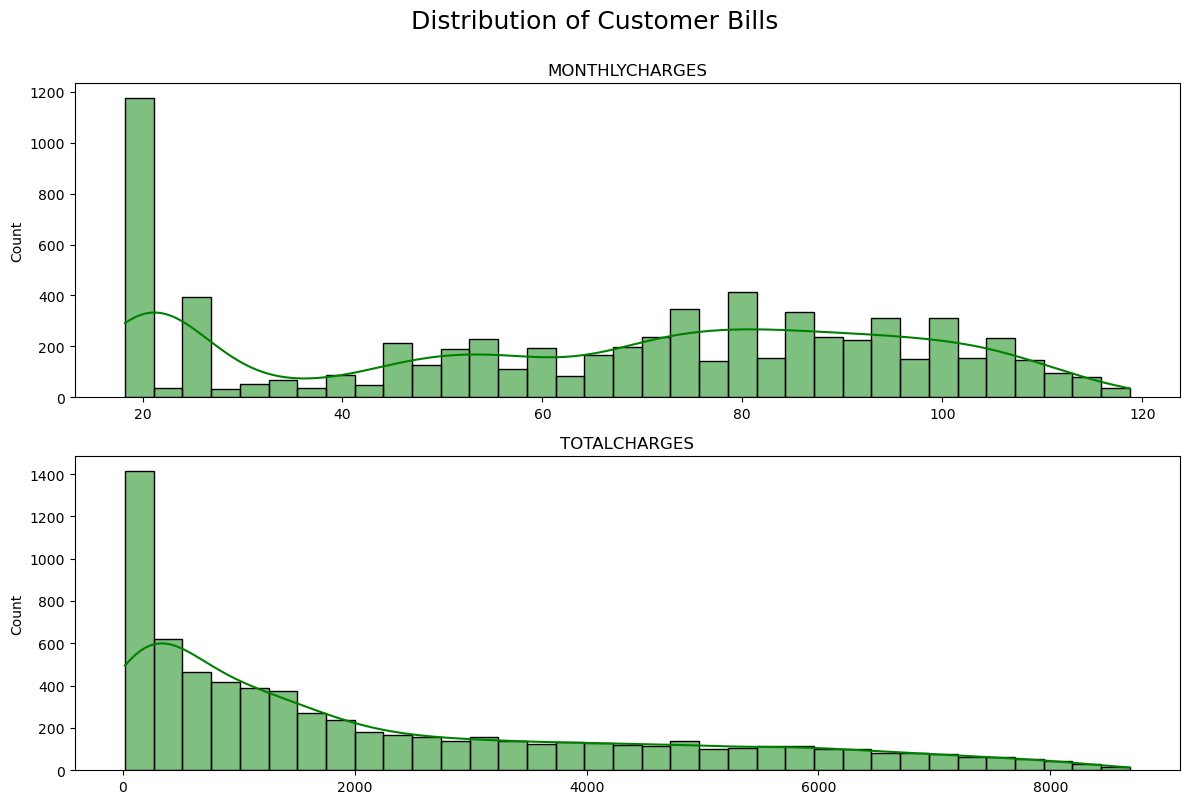

In [39]:
# define numeric columns
numeric = ['monthlycharges', 'totalcharges']

# create subplots
plt.figure(figsize=(12, 8))
plt.suptitle("Distribution of Customer Bills", fontsize=18, y=1)

# loop through numeric columns
for n, column in enumerate(numeric, start=1):
    plt.subplot(len(numeric), 1, n)
    sns.histplot(data=telecom, x=column, bins=35, kde=True, color='green')
    plt.title(column.upper())
    plt.xlabel('')

plt.tight_layout()
plt.show()

**Findings :**

- The most monthly bill is around 20 USD, increased around 30 USD to 80 USD, and begein to decline in range 80 USD to 120 USD
- The majority of `totalcharges` is below 2000 USD, and it's happen to make a positive distribution

### Categoric Data Distribution

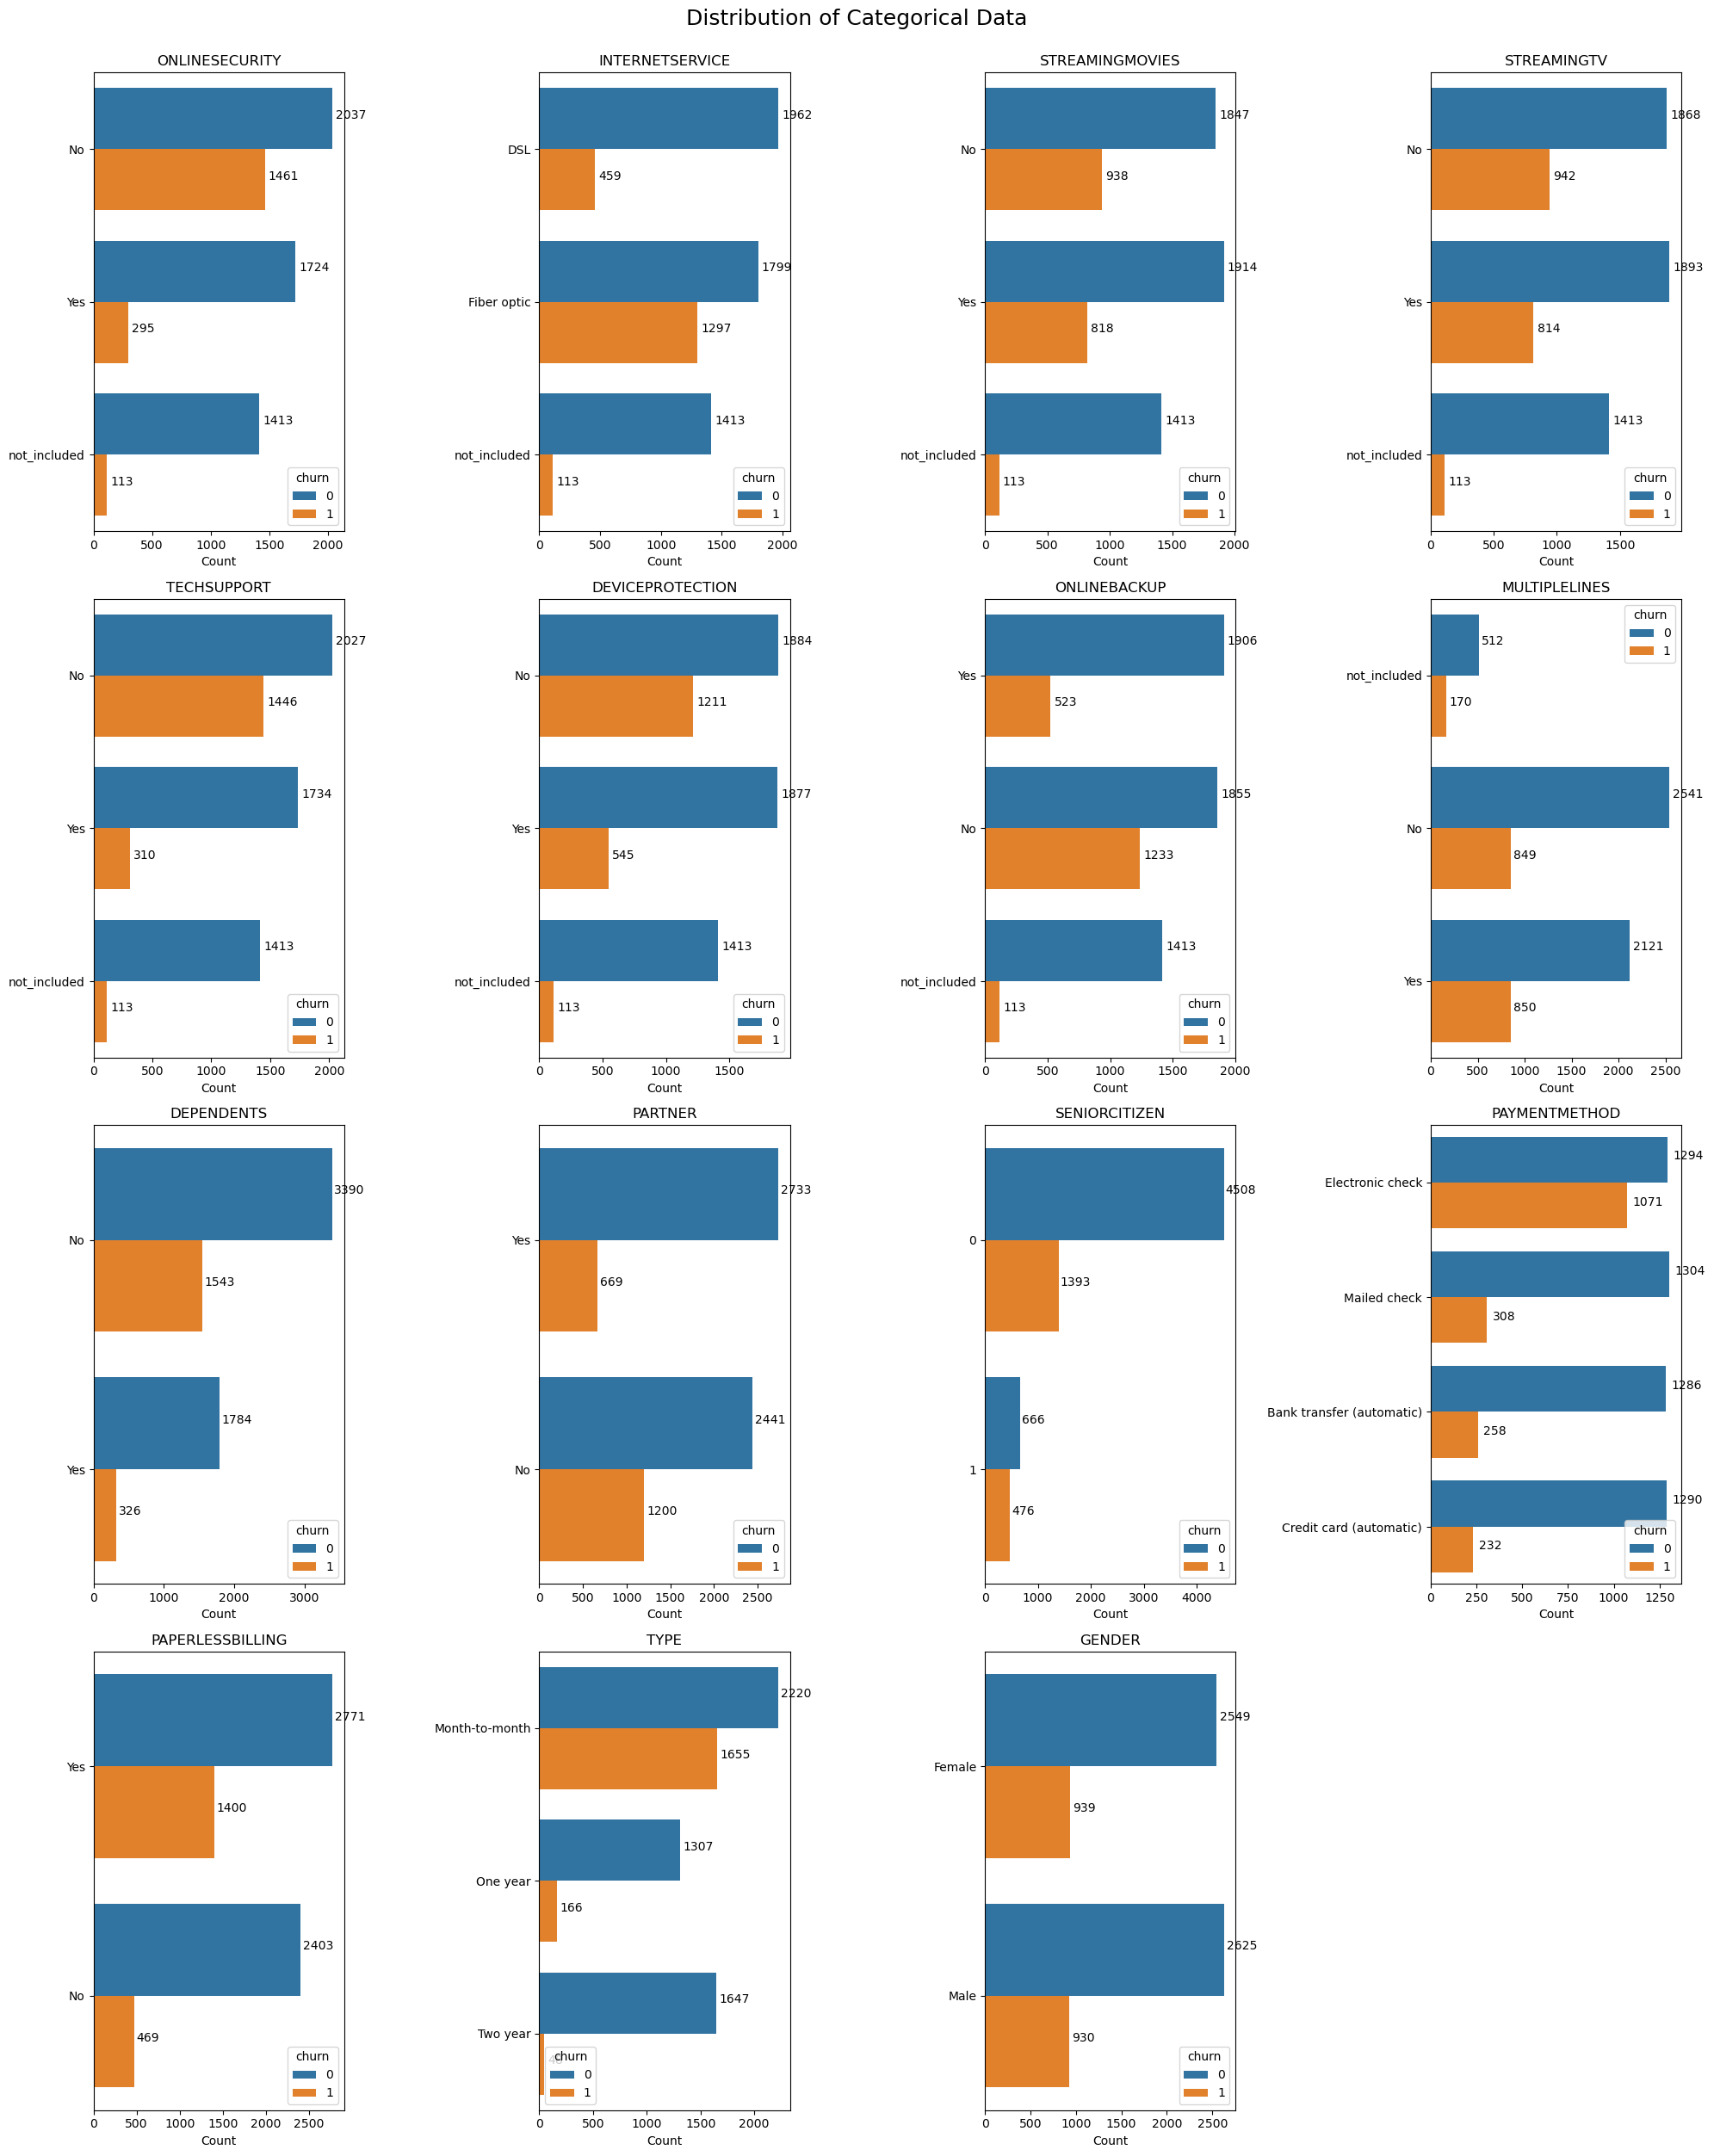

In [40]:
# Define Categorical Columns
categorical = ['onlinesecurity', 'internetservice', 'streamingmovies', 'streamingtv',
               'techsupport', 'deviceprotection', 'onlinebackup', 'multiplelines',
               'dependents', 'partner', 'seniorcitizen', 'paymentmethod',
               'paperlessbilling', 'type', 'gender']

# Create Subplots
plt.figure(figsize=(20, 25))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Distribution of Categorical Data', fontsize=18, y=1)

# Calculate Rows and Columns
nrows = 4
ncols = (len(categorical) + nrows - 1) // nrows

# Loop through Categorical Columns
for n, cat in enumerate(categorical, start=1):
    plt.subplot(nrows, ncols, n)

    # Create countplot
    splot = sns.countplot(data=telecom, y=cat, hue='churn')

    # Annotate bars with count
    for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_width()), (p.get_width() + 30, p.get_y() + p.get_height() / 2))

    plt.title(cat.upper())
    plt.ylabel('')
    plt.xlabel('Count')

plt.tight_layout()
plt.show()

Question:
- Do `seniorcitizens` have a tendency to churn?
- Are customers who pay on a monthly basis more likely to churn than contract customers?
- Which payment method has the highest churn rate?
- Do customers who use services such as `onlinesecurity`, `onlinebackup`, `techsupport` have a lower churn rate compared to customers who do not use these services?

Answer Question :
- `seniorcitizens` more choose to churn than do not
- The customer who does monthly subscribe have higher churn rate than the others
- Electronic check is the most used regarding the payment
- Whether they use the services or not, they all have a low churn rate


**Findings :**
- Gender is independent of churn decisions
- `techsupport` and `onlinesecurity` are the most services that make the customer decided to churn

## Modelling

### Features Engineering (Machine Learning)

- Column that contain Yes or No values, or only have 2 values such as `dependants`, `partner`, `gender`, etc  into 0 and 1.
- Column that contain information about the service or contain more than two values such as `techsupport`, `multiplelines`, etc will use One Hot Encoding to transform into numeric.

In [41]:
# drop unnecessary columns and create new dataframe

df = telecom.drop(['customerid', 'begindate', 'enddate'], axis=1)

In [42]:
# transforms the value in the personal data column

encoder = LabelEncoder()

personal = ['dependents',
           'partner',
           'paperlessbilling',
           'gender']

for val in personal:
    df[val] = encoder.fit_transform(df[val])
    val = {index : label for index, label in enumerate(encoder.classes_)}
    print(val)

{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'Yes'}
{0: 'Female', 1: 'Male'}


In [43]:
# split the data into features and target

x = df.drop(['churn'], axis=1)
y = df['churn']

In [44]:
# split data for train and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)

In [45]:
# copy for catboost

features_train = x_train.copy()
features_test = x_test.copy()
target_train = y_train.copy()
target_test = y_test.copy()

In [46]:
# convert categorical variables to indicator variables

x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

#### Scaling and Upsampling

In [47]:
# scaling for spesific column

col_chose_ml = ['monthlycharges', 'totalcharges', 'totalmonths']

scaler = MinMaxScaler()
x_train[col_chose_ml] = scaler.fit_transform(x_train[col_chose_ml])
x_test[col_chose_ml] = scaler.fit_transform(x_test[col_chose_ml])

In [48]:
# checking for data balance

print('Distribution of Churn Value')
print('Train Data :')
print(y_train.value_counts())
print('Test Data :')
print(y_test.value_counts())

Distribution of Churn Value
Train Data :
0    4144
1    1490
Name: churn, dtype: int64
Test Data :
0    1030
1     379
Name: churn, dtype: int64


In [49]:
# upsampling the imbalance data with SMOTE

x_ups, y_ups = SMOTE(random_state=12345).fit_resample(x_train, y_train)

y_ups.value_counts()

0    4144
1    4144
Name: churn, dtype: int64



### Feature Engineering (CatBoost)

In [50]:
# labeling for categoric data

encoder = LabelEncoder()

label_cols = ['type',
              'paymentmethod',
              'internetservice',
              'onlinesecurity',
              'onlinebackup',
              'deviceprotection',
              'techsupport',
              'streamingtv',
              'streamingmovies',
              'multiplelines']

for col in label_cols:
    features_train[col] = encoder.fit_transform(features_train[col])
    features_test[col] = encoder.fit_transform(features_test[col])
    col = {index : label for index, label in enumerate(encoder.classes_)}
    print(col)

{0: 'Month-to-month', 1: 'One year', 2: 'Two year'}
{0: 'Bank transfer (automatic)', 1: 'Credit card (automatic)', 2: 'Electronic check', 3: 'Mailed check'}
{0: 'DSL', 1: 'Fiber optic', 2: 'not_included'}
{0: 'No', 1: 'Yes', 2: 'not_included'}
{0: 'No', 1: 'Yes', 2: 'not_included'}
{0: 'No', 1: 'Yes', 2: 'not_included'}
{0: 'No', 1: 'Yes', 2: 'not_included'}
{0: 'No', 1: 'Yes', 2: 'not_included'}
{0: 'No', 1: 'Yes', 2: 'not_included'}
{0: 'No', 1: 'Yes', 2: 'not_included'}


#### Scaling and Upsampling

In [51]:
# scaling for spesific column

col_chose_cb = ['monthlycharges', 'totalcharges', 'totalmonths']

scaler = MinMaxScaler()
features_train[col_chose_cb] = scaler.fit_transform(features_train[col_chose_cb])
features_test[col_chose_cb] = scaler.fit_transform(features_test[col_chose_cb])

In [52]:
# upsampling the imbalance data with SMOTE

features_train, target_train = SMOTE(random_state=12345).fit_resample(features_train, target_train)

target_train.value_counts()

0    4144
1    4144
Name: churn, dtype: int64

## Model Training

In [53]:
x_ups.sample(10)

,paperlessbilling,monthlycharges,totalcharges,totalmonths,gender,seniorcitizen,partner,dependents,type_One year,type_Two year,...,deviceprotection_Yes,deviceprotection_not_included,techsupport_Yes,techsupport_not_included,streamingtv_Yes,streamingtv_not_included,streamingmovies_Yes,streamingmovies_not_included,multiplelines_Yes,multiplelines_not_included
4087,0,0.507463,0.511072,0.900000,1,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,0
2231,1,0.019403,0.014095,0.100000,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
1363,0,0.013433,0.008614,0.042857,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0
2342,1,0.560697,0.205279,0.342857,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7243,0,0.064606,0.001921,0.005832,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3410,0,0.621393,0.041080,0.057143,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0,0.010448,0.000058,0.000000,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
4416,1,0.068657,0.150975,0.785714,1,0,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
3487,1,0.612935,0.015422,0.014286,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
5453,1,0.775622,0.138847,0.142857,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [54]:
features_train.sample(10)

,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,totalmonths,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,gender,seniorcitizen,partner,dependents,multiplelines
3103,1,0,0,0.079104,0.108020,0.485714,2,2,2,2,2,2,2,1,0,0,0,1
7335,0,0,3,0.016968,0.006293,0.031598,2,2,2,2,2,2,2,0,0,0,0,0
3954,0,1,3,0.114925,0.088588,0.357143,0,0,0,1,0,0,0,0,0,0,1,2
3239,2,1,0,0.956219,0.882414,0.971429,1,1,1,1,1,1,1,1,0,1,1,1
7248,0,0,2,0.556091,0.036790,0.055021,1,0,0,0,0,0,0,1,0,0,0,1
4709,2,0,3,0.457711,0.115994,0.214286,0,1,0,1,0,1,0,1,0,1,1,0
6698,0,1,1,0.523350,0.129873,0.217419,1,0,0,0,0,0,0,0,0,0,0,0
5345,2,1,2,0.761692,0.539101,0.685714,1,0,1,0,0,1,1,1,0,1,0,0
4389,0,0,2,0.564179,0.091934,0.128571,1,0,1,0,0,0,0,1,0,0,0,0
1081,0,1,2,0.428358,0.026610,0.042857,0,0,0,0,1,1,0,1,0,0,0,0


In [55]:
# machine learning algorithm

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

### Basic Parameter for all Models

In [56]:
def create_models(seed=2):
    return [
        ('Dummy Classifier', DummyClassifier(random_state=seed, strategy='most_frequent')),  # Dummy Classifier
        ('Logistic Regression', LogisticRegression(random_state=seed)),  # Logistic Regression
        ('Support Vector Machines', SVC(random_state=seed)),  # Support Vector Machines
        ('K-Nearest Neighbors', KNeighborsClassifier()),  # K-Nearest Neighbors
        ('Random Forest', RandomForestClassifier(random_state=seed)),  # Random Forest
        ('Gradient Boosting', XGBClassifier(random_state=seed))  # Gradient Boosting
    ]

# Create a list of machine learning models with default seed (seed=2)
models = create_models()

In [57]:
%%time

results = []

scoring = 'roc_auc'
for name, model in models:
    # Fit the model with the training data
    model.fit(x_ups, y_ups)

    # Make predictions with the training data
    predictions_train = model.predict(x_ups)

    # Make predictions with the testing data
    predictions_test = model.predict(x_test)

    # Calculate ROC-AUC
    roc_auc_train = roc_auc_score(y_ups, predictions_train)
    roc_auc_test = roc_auc_score(y_test, predictions_test)

    # Append the results to the list as a dictionary
    results.append({'name': name, 'ROC-AUC train': roc_auc_train, 'ROC-AUC test': roc_auc_test})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)
display(results_df)

c:\Users\Mahendra Alfath\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Mahendra Alfath\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

,name,ROC-AUC train,ROC-AUC test
0,Dummy Classifier,0.500000,0.500000
1,Logistic Regression,0.797539,0.753248
2,Support Vector Machines,0.825290,0.759633
3,K-Nearest Neighbors,0.858229,0.702740
4,Random Forest,0.998793,0.723282
5,Gradient Boosting,0.943412,0.719958


Wall time: 7.95 s


### Model Evaluate

In [58]:
# parameter for kfold

def model_evaluate(model, x_train, y_train, x_test, y_test):
    cv = KFold(n_splits=5, random_state=12345, shuffle=True)
    scores = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    train_auc_mean = np.abs(scores).mean()
    print('Kfold ROC-AUC Train:', train_auc_mean)

    model.fit(x_train, y_train)
    y_test_predict = model.predict(x_test)
    test_roc_auc = roc_auc_score(y_test, y_test_predict)
    test_accuracy = accuracy_score(y_test, y_test_predict)
    print('ROC-AUC Test:', test_roc_auc)
    print('Accuracy Test:', test_accuracy)

    # Creating ROC curve
    probabilities_valid = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probabilities_valid)

    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Graph')
    plt.show()

In [59]:
# important feature

def important_feature(importance, names, model_type):
    # Create a DataFrame from feature importance and names
    fi_df = pd.DataFrame({'feature': names, 'the_importance': importance})

    # Sort the DataFrame by feature importance in descending order
    fi_df = fi_df.sort_values(by='the_importance', ascending=False)

    # Define size of bar plot
    plt.figure(figsize=(10, 7))

    # Plot Seaborn bar chart
    sns.barplot(data=fi_df, x='the_importance', y='feature')

    # Add chart labels
    plt.title(model_type + ' Important Feature')
    plt.xlabel('Important Feature')
    plt.ylabel('Feature Name')

### Logistic Regression

Kfold ROC-AUC Train: 0.8785790714328451
ROC-AUC Test: 0.7532482004252377
Accuracy Test: 0.7501774308019872


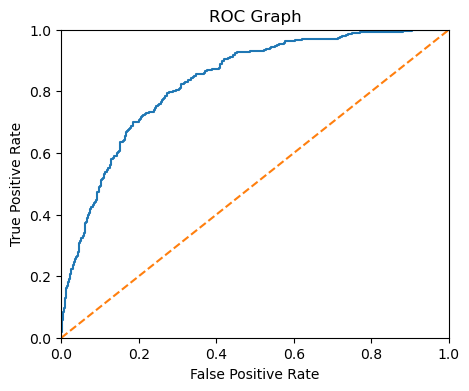

In [60]:
# LR model training

lr = LogisticRegression()

model_evaluate(lr, x_ups, y_ups, x_test, y_test)

In [61]:
# LR for train set and test set

lr.fit(x_ups, y_ups)
y_train_lr = lr.predict(x_ups)
y_test_lr = lr.predict(x_test)

print('Train Data:', roc_auc_score(y_ups, y_train_lr))
print('Test Data:', roc_auc_score(y_test, y_test_lr))

Train Data: 0.79753861003861
Test Data: 0.7532482004252377


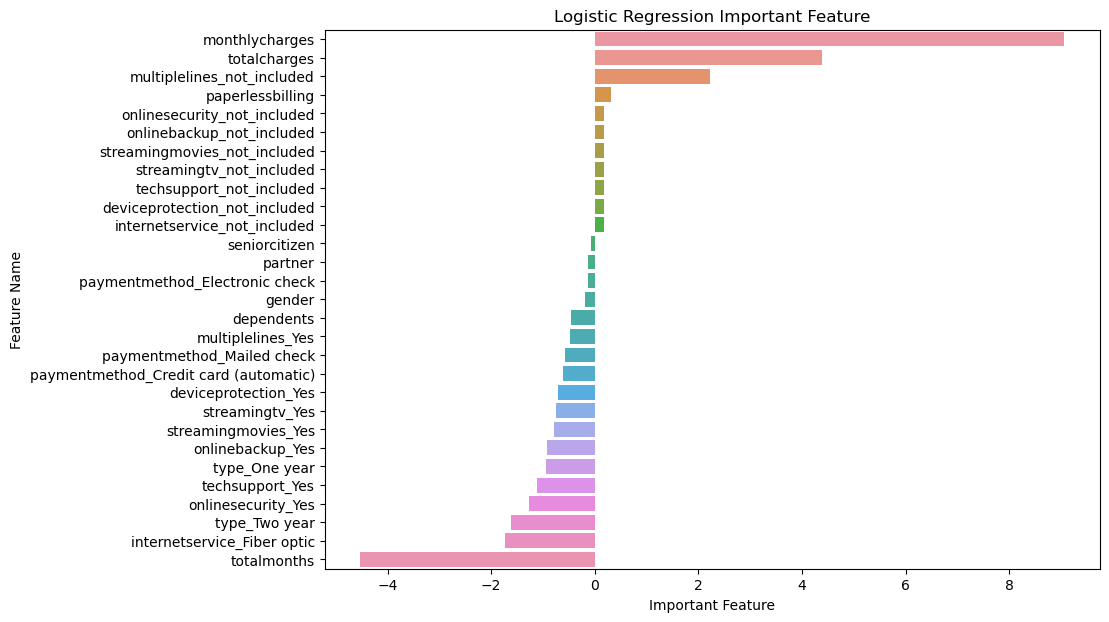

In [62]:
# LR for important feature
important_feature(lr.coef_[0], x_ups.columns, 'Logistic Regression')

**Findings :**

- The result for Logistic Regression is quite good if we use kfold, but this may occur due to overfitting
- Around 75% for ROC-AUC score with 75% accuracy
- Around 79% accuracy for train set and around 75% for test set, its not quite impressing
- `monthlycharges` and `totalcharges` are the highest number for contribution, while the `totalmonths` has negative contribution

### K Nearest Neighbor

In [63]:
%%time

# KNN parameter grid
knn_param = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# KNN grid search
knn_grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_param,
    scoring='roc_auc',
    n_jobs=10,
    cv=10,
    verbose=True
)

# fitting the model
knn_grid_search.fit(x_ups, y_ups)
print(knn_grid_search.best_params_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Wall time: 24.7 s


Kfold ROC-AUC Train: 0.8896302569151799
ROC-AUC Test: 0.7067602530932193
Accuracy Test: 0.7004968062455642


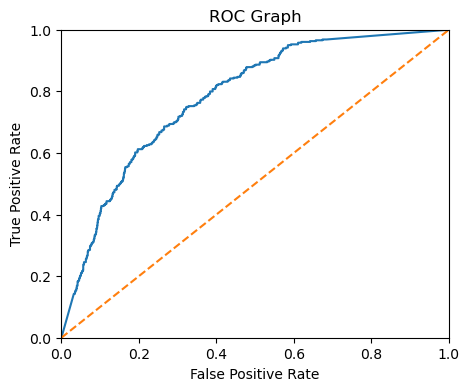

Wall time: 2.39 s


In [64]:
%%time

# KNN for best parameter

knn = KNeighborsClassifier(metric='manhattan',
                           n_neighbors=10,
                           weights='distance'
)

model_evaluate(knn, x_ups, y_ups, x_test, y_test)

In [65]:
# KNN for train and test set

knn.fit(x_ups, y_ups)
y_train_knn = knn.predict(x_ups)
y_test_knn = knn.predict(x_test)

print('Train Data:', roc_auc_score(y_ups, y_train_knn))
print('Test Data:', roc_auc_score(y_test, y_test_knn))

Train Data: 0.9987934362934363
Test Data: 0.7067602530932193


**Findings :**

- The result for KNearestNeighbor is quite good if we use kfold, but this also may occur due to overfitting
- Around 70% for ROC-AUC score with 70% accuracy
- Almost 100% accuracy for train set buat just 70% for test set, its not quite impressing

### Decision Tree

In [66]:
%%time

# DT parameter grid
dt_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11)
}

# DT grid search
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=12345),
    param_grid=dt_param,
    scoring='roc_auc',
    n_jobs=10,
    cv=10,
    verbose=True
)

# Fitting the model
print(dt_grid_search.best_params_ if dt_grid_search.fit(x_ups, y_ups) else None)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'criterion': 'gini', 'max_depth': 7}
Wall time: 1.47 s


Kfold ROC-AUC Train: 0.854632037473616
ROC-AUC Test: 0.7457437815405897
Accuracy Test: 0.7501774308019872


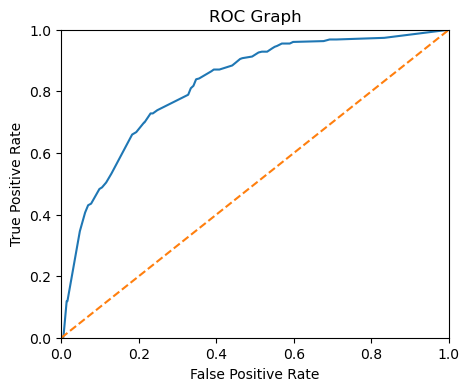

Wall time: 594 ms


In [67]:
%%time

# DT for best parameter

dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=7
)

model_evaluate(dt, x_ups, y_ups, x_test, y_test)

In [68]:
# DT for train and test set

dt.fit(x_ups, y_ups)
y_train_dt = dt.predict(x_ups)
y_test_dt = dt.predict(x_test)

print('Train Data:', roc_auc_score(y_ups, y_train_dt))
print('Test Data:', roc_auc_score(y_test, y_test_dt))

Train Data: 0.8045366795366795
Test Data: 0.7462292184337938


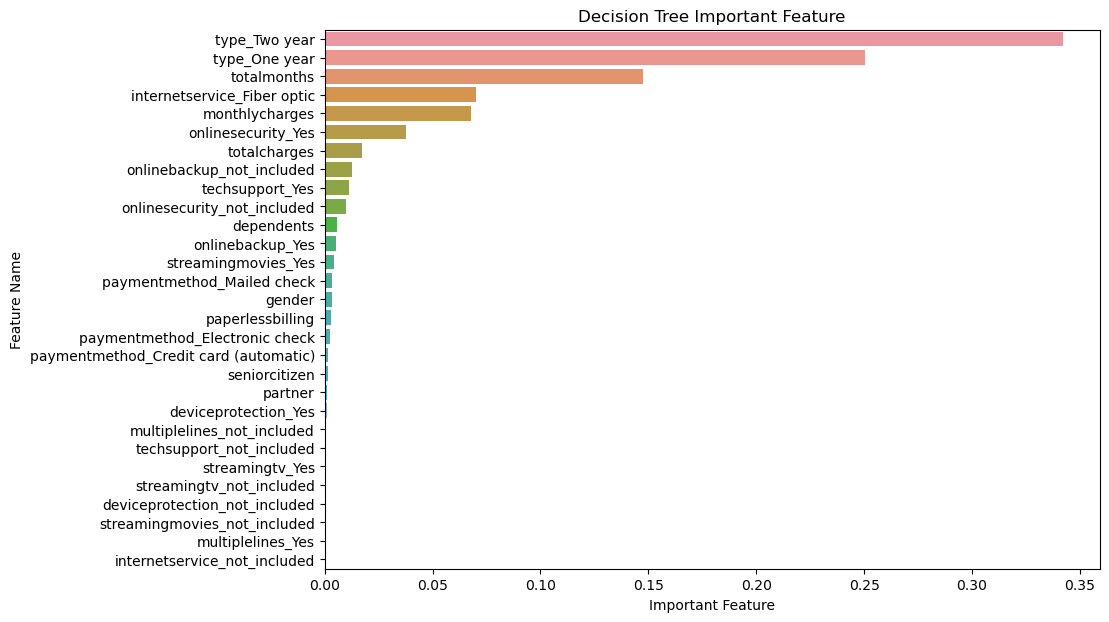

In [69]:
# RF for important feature

important_feature(dt.feature_importances_, x_ups.columns, 'Decision Tree')

**Findings :**

- The result for Decision Tree is quite good if we use kfold, but this also may occur due to overfitting
- Around 77% for ROC-AUC score with 75.5% accuracy
- Around 81% accuracy for train set and around 77% for test set, its quite good
- All features happen to have a positive correlation with `totalmonths` is the highest number for that

### Random Forest

In [70]:
%%time

# RF parameter grid
rf_param = {
    'n_estimators': range(100, 600, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1, 8),
    'criterion' :['gini', 'entropy']
}

# RF grid search
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=12345),
    param_grid=rf_param,
    scoring='roc_auc',
    n_jobs=10,
    cv=10,
    verbose=True
)

# fitting the model
print(rf_grid_search.best_params_ if rf_grid_search.fit(x_ups, y_ups) else None)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 300}
Wall time: 7min 18s


Kfold ROC-AUC Train: 0.8768497008213432
ROC-AUC Test: 0.7734597945538848
Accuracy Test: 0.7565649396735273


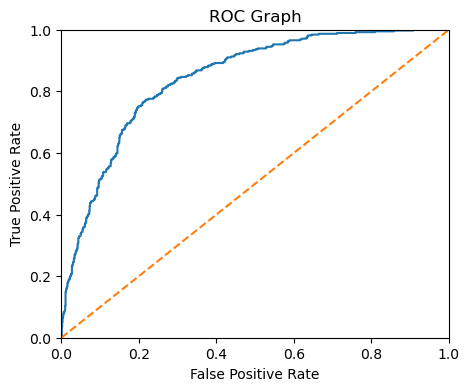

Wall time: 2.51 s


In [71]:
%%time

# RF for best parameter

rf = RandomForestClassifier(criterion='gini',
                            max_depth=7,
                            max_features='auto',
                            n_estimators=200
)

model_evaluate(rf, x_ups, y_ups, x_test, y_test)

In [72]:
# RF for train and test set

rf.fit(x_ups, y_ups)
y_train_rf = rf.predict(x_ups)
y_test_rf = rf.predict(x_test)

print('Train Data:', roc_auc_score(y_ups, y_train_rf))
print('Test Data:', roc_auc_score(y_test, y_test_rf))

Train Data: 0.8131032818532818
Test Data: 0.7603414709122115


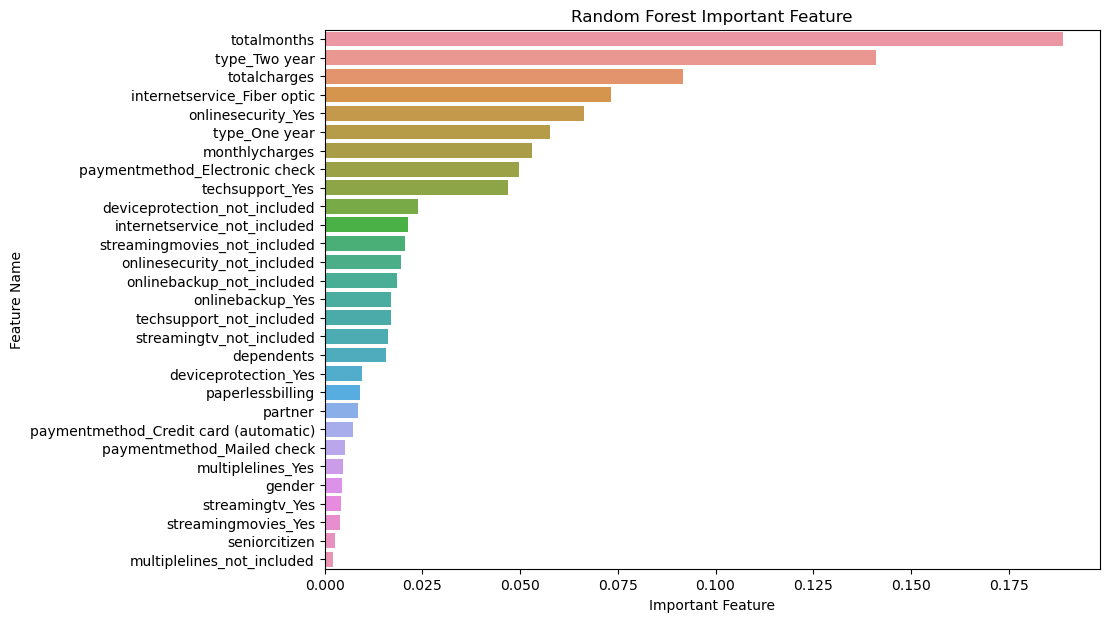

In [73]:
# RF for important feature

important_feature(rf.feature_importances_, x_ups.columns, 'Random Forest')

**Findings :**

- The result for Random Forest is quite good if we use kfold, but this also may occur due to overfitting
- Around 77% for ROC-AUC score with 75.5% accuracy
- Around 81% accuracy for train set and around 77% for test set, its quite good
- All features happen to have a positive correlation with `totalmonths` is the highest number for that

### CatBoost

In [74]:
# categoric column for CB

cb_catcol = ['seniorcitizen',
            'partner',
            'dependents',
            'type',
            'paperlessbilling',
            'paymentmethod',
            'internetservice',
            'onlinesecurity',
            'onlinebackup',
            'deviceprotection',
            'techsupport',
            'streamingtv',
            'streamingmovies',
            'multiplelines',
            'gender'
]

In [75]:
%%time

# CB parameter grid
cb_parameters = {
    'depth': range(1, 8),
    'learning_rate': [0.01, 0.02, 0.03, 0.04],
    'iterations': range(80, 121, 10)
}

# PCB grid search
cb_search = GridSearchCV(CatBoostClassifier(cat_features=cb_catcol, task_type='GPU', verbose=False),
                         param_grid=cb_parameters,
                         scoring='roc_auc',
                         cv=10,
                         verbose=True)

# fitting the model
print(cb_search.best_params_ if cb_search.fit(features_train, target_train) else None)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
{'depth': 7, 'iterations': 120, 'learning_rate': 0.04}
Wall time: 18min 29s


Kfold ROC-AUC Train: 0.8817641307941582
ROC-AUC Test: 0.7625573174168097
Accuracy Test: 0.751596877217885


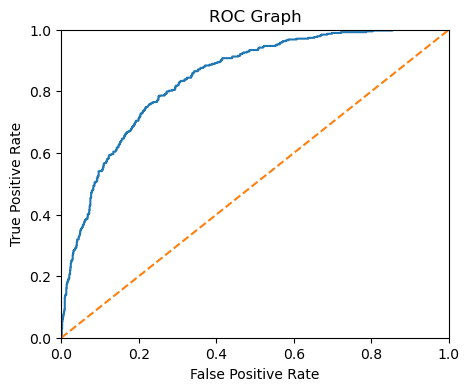

Wall time: 40.9 s


In [76]:
%%time

# CB for best parameter

cb = CatBoostClassifier(cat_features=cb_catcol,
                        task_type='GPU',
                        depth=7,
                        iterations=120,
                        learning_rate=0.04,
                        verbose=False
)

model_evaluate(cb, features_train, target_train, features_test, target_test)

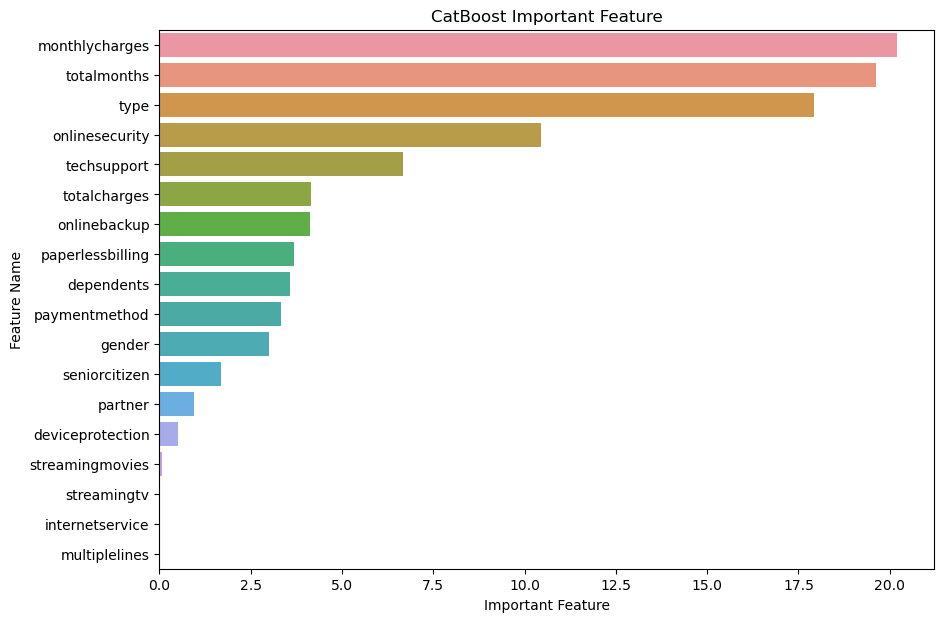

In [77]:
# CB for important feature

important_feature(cb.get_feature_importance(), features_train.columns, 'CatBoost')

**Findings :**

- The result for CatBoost is quite good if we use kfold, but this also may occur due to overfitting
- Around 76% for ROC-AUC score with 75% accuracy
- All features happen not to have a negative correlation with `monthlycharge` is the highest number for that

### XG Boost

In [78]:
%%time

# XGB parameter grid
xgb_param = {
    'max_depth': range(1, 10),
    'learning_rate': [0.1, 0.01, 0.05, 0.001],
    'n_estimators': range(80, 121, 10)
}

# XGB grid search
xgb_search = GridSearchCV(XGBClassifier(tree_method='hist', device='cuda', objective='binary:logistic', nthread=4, seed=42),
                         param_grid=xgb_param,
                         scoring='roc_auc',
                         n_jobs=10,
                         cv=10,
                         verbose=True
)

# fitting the model
print(xgb_search.best_params_ if xgb_search.fit(x_ups, y_ups) else None)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 120}
Wall time: 9min 45s


Kfold ROC-AUC Train: 0.9162604177986353
ROC-AUC Test: 0.7323167763916284
Accuracy Test: 0.7622427253371186


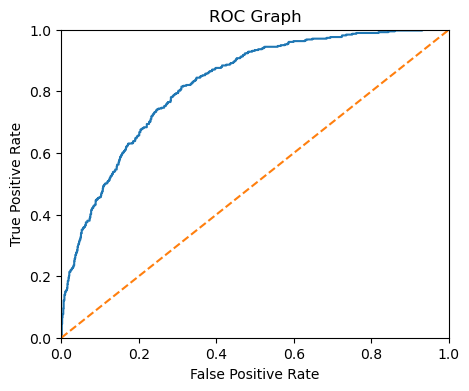

Wall time: 2.2 s


In [79]:
%%time

# XGB for best parameter

xgb = XGBClassifier(objective= 'binary:logistic',
                          nthread=4,
                          seed=42,
                          learning_rate=0.1,
                          max_depth=9,
                          n_estimators=120)

model_evaluate(xgb, x_ups, y_ups, x_test, y_test)

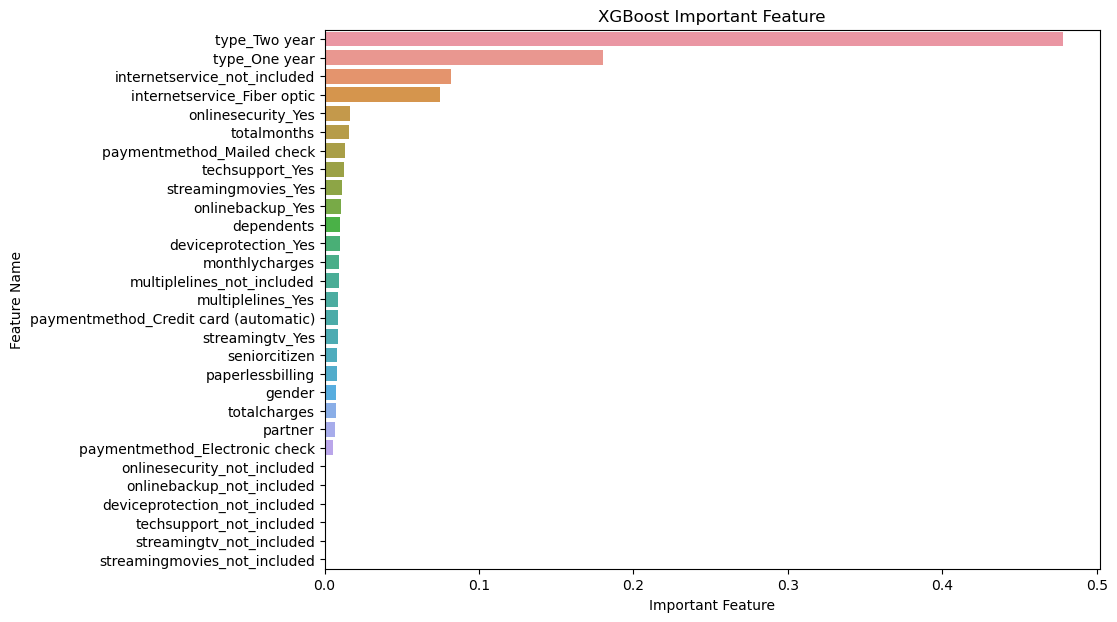

In [80]:
# XGB important features
important_feature(xgb.feature_importances_, x_ups.columns, 'XGBoost')

**Findings :**

- The result for XG Boost is quite good if we use kfold, but this also may occur due to overfitting
- Around 73% for ROC-AUC score with 76% accuracy
- All features happen not to have a negative correlation with

### Artificial Neural Network

The project will be using a multilayer perception model (MLP). MLP model has at least one or more hidden layers of nodes, one layer for input and another layer for the output

In [81]:
# import packages

from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [82]:
x_train.head()

,paperlessbilling,monthlycharges,totalcharges,totalmonths,gender,seniorcitizen,partner,dependents,type_One year,type_Two year,...,deviceprotection_Yes,deviceprotection_not_included,techsupport_Yes,techsupport_not_included,streamingtv_Yes,streamingtv_not_included,streamingmovies_Yes,streamingmovies_not_included,multiplelines_Yes,multiplelines_not_included
1580,0,0.531841,0.170580,0.285714,0,1,1,0,1,0,...,1,0,0,0,0,0,1,0,1,0
2902,1,0.555721,0.049862,0.071429,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
410,1,0.627861,0.024798,0.028571,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6098,1,0.573632,0.176662,0.285714,1,0,1,1,1,0,...,0,0,0,0,1,0,1,0,1,0
2930,0,0.074627,0.085022,0.428571,1,0,1,1,0,1,...,0,1,0,1,0,1,0,1,1,0


In [83]:
y_test.value_counts()

0    1030
1     379
Name: churn, dtype: int64

In [84]:
model = Sequential()
#model.add(InputLayer(input_shape=x_train.shape[1:]))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [85]:
# compile the model

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [86]:
%%time

# train the model

output_range = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
177/177 [==============================] - 1s 943us/step - loss: 0.5955 - accuracy: 0.6695
Epoch 2/15
177/177 [==============================] - 0s 812us/step - loss: 0.4675 - accuracy: 0.7684
Epoch 3/15
177/177 [==============================] - 0s 806us/step - loss: 0.4428 - accuracy: 0.7895
Epoch 4/15
177/177 [==============================] - 0s 806us/step - loss: 0.4348 - accuracy: 0.7906
Epoch 5/15
177/177 [==============================] - 0s 814us/step - loss: 0.4288 - accuracy: 0.7950
Epoch 6/15
177/177 [==============================] - 0s 894us/step - loss: 0.4263 - accuracy: 0.7978
Epoch 7/15
177/177 [==============================] - 0s 812us/step - loss: 0.4228 - accuracy: 0.7971
Epoch 8/15
177/177 [==============================] - 0s 895us/step - loss: 0.4211 - accuracy: 0.7989
Epoch 9/15
177/177 [==============================] - 0s 806us/step - loss: 0.4197 - accuracy: 0.7984
Epoch 10/15
177/177 [==============================] - 0s 812us/step - loss: 0.417

In [87]:
output_range.history

{'loss': [0.5955321788787842,
  0.46747615933418274,
  0.4428047835826874,
  0.4348220229148865,
  0.4287676513195038,
  0.42628219723701477,
  0.42281845211982727,
  0.4211164116859436,
  0.4197198152542114,
  0.41743648052215576,
  0.4162159264087677,
  0.4145526587963104,
  0.413450688123703,
  0.4128565192222595,
  0.4119548499584198],
 'accuracy': [0.6695065498352051,
  0.7683706283569336,
  0.7894923686981201,
  0.790557324886322,
  0.7949946522712708,
  0.797834575176239,
  0.7971246242523193,
  0.7988995313644409,
  0.7983670830726624,
  0.8031594157218933,
  0.8028044104576111,
  0.8033368587493896,
  0.8061767816543579,
  0.8056442737579346,
  0.808661699295044]}

From the output, loss typically decreases and accuracy improves in each epoch. However, the rate of model performance improvement decreases over time.

In [88]:
# model result

train_set_preds = [round(x[0]) for x in model.predict(x_train)]
test_set_preds = [round(x[0]) for x in model.predict(x_test)]

45/45 [==============================] - 0s 736us/step


Evaluate the model using accuracy, precision, recall, as well as the receiver operating characteristic (ROC) curve and area under the curve (AUC).

In [89]:
# Model evaluate

print('Accuracy for test set: %0.4f' % accuracy_score(y_test, test_set_preds))
print('Accuracy for train set: %0.4f' % accuracy_score(y_train, train_set_preds))

print('\n')

print('Precision for test set: %0.4f' % precision_score(y_test, test_set_preds))
print('Precision for train set: %0.4f' % precision_score(y_train, train_set_preds))

print('\n')

print('Recall for test set: %0.4f' % recall_score(y_test, test_set_preds))
print('Recall for train set: %0.4f' % recall_score(y_train, train_set_preds))

Accuracy for test set: 0.8020
Accuracy for train set: 0.8087


Precision for test set: 0.6623
Precision for train set: 0.6630


Recall for test set: 0.5383
Recall for train set: 0.5624


The accuracy for train and test sets is quite similar, which indicates that the model is slightly overfitted and predicts better for the train set. Precision (prediction of positive values) is about 0.64, which shows how well the model predicts customers who will churn.

In [90]:
train_preds = [x[0] for x in model.predict(x_train)]
test_preds = [x[0] for x in model.predict(x_test)]

45/45 [==============================] - 0s 710us/step


In [91]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_preds)

In [92]:
train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

print('AUC for test set: %0.4f' % test_roc_auc)
print('AUC for train set: %0.4f' % train_roc_auc)

AUC for test set: 0.8372
AUC for train set: 0.8523


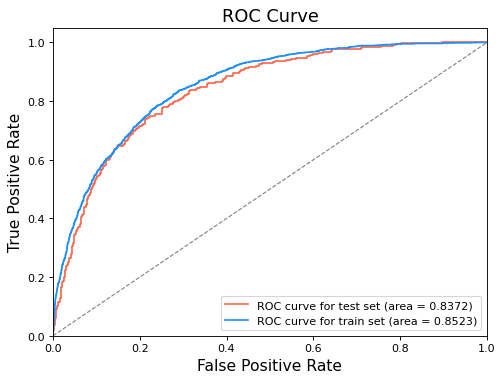

In [93]:
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

**Findings :**
- Using ANN model and got AUC for the test set=0.84, which can help to predict customers who are planning to churn

## Summary

We have trained the data using several models. Some models happen to have overfitting even though we have used cross-validation to train the train set.

Here is summary of ROC-AUC score:

- Logistic Regression, 88% on train set using cross-validation, 75% on test set.
- K Nearest Neighbor, 89% on the train set using cross-validation, 71% on the test set.
- Decision Tree, 85% on the train set using cross-validation, 75% on the test set.
- Random Forest, 88% on train set using cross-validation, 77% on test set.
- CatBoost, 88% on the train set using cross-validation, 76% on the test set.
- XGBoost, 92% on the train set using cross-validation, 73% on the test set.
- Artificial Neural Network, 84% on the train set using cross-validation, 85% on the test set.

The best model in this project is the Artificial Neural Network model and also a short time to train this model.

## Report

**Introduction**:

This project aims to predict when telecom customers might stop using the company's services, which is called "customer churn." To do this, they're using data like customer information, account details, and usage patterns. The goal is to make a model that can find customers who might leave and provide useful insights to help the business keep them.

**Pre-processing Data**:

The initial task in this project was data preprocessing. This involved merging contract, personal, and service data, dealing with missing values, removing unnecessary variables, and converting categorical variables into nominal ones. Then, the data was divided into an 80% training set and a 20% testing set for model development and evaluation.

**Exploratory Data Analysis (EDA)**:

After preparing the data, we conducted exploratory data analysis (EDA) to better understand it. During EDA, we looked for patterns and relationships between different variables and customer churn. Here are some insights from our analysis:

1. Customers with shorter-term contracts are more prone to leaving the company.
2. Compared to customers with long-term contracts, those with monthly contracts are more likely to churn.
3. Customers who use data security services without having internet access are more likely to churn.
4. Customers with low monthly charges are at a higher risk of leaving.
5. Senior customers are more inclined to leave the company.
6. Customers with long-term contracts are more common among those who have children and partners.

**Model Training and Evaluation**:

In our effort to predict customer churn, we employed a range of machine learning models. These included Logistic Regression, KNearest Neighbor, Decision Tree, Random Forest, Gradient Boosting with CatBoost and XGBoost, as well as an Artificial Neural Network (ANN) implemented with Keras.

To evaluate these models, we used the ROC-AUC score. Notably, the ANN model outperformed the others, achieving an impressive ROC-AUC score of 85% on the test dataset. The remaining models demonstrated ROC-AUC scores ranging from 70% to 80%.

**Important Feature**:

We also examined the significance of different features in predicting churn. The top five crucial factors include contract duration, monthly fees, total charges, the number of months a customer has been with the company totalmonths, payment method, and internet service. By focusing on these aspects, the business can effectively reduce churn.

**Result**:

The table below presents the ROC-AUC scores for each model on both the training and test sets:

- Logistic Regression produces 75% on test set.
- K Nearest Neighbor produces 71% on the test set.
- Decision Tree produces 75% on the test set.
- Random Forest produces 77% on test set.
- CatBoost produces 76% on the test set.
- XGBoost produces 73% on the test set.
- Artificial Neural Network produces 85% on the test set.

**Difficulty**:

Selecting an appropriate model for training the data presented a challenge in this project. This was particularly evident in the algorithms we selected, where some exhibited the issue of overfitting.

**Conclusion**:

This project showcases the practicality of using machine learning models to predict customer churn in the telecom sector. The Artificial Neural Network model stood out with an impressive 85% ROC-AUC score, demonstrating its superior performance. By delving into feature importance, businesses can discern the pivotal factors for churn prediction and proactively retain customers. In essence, this research underscores the potential of data science and machine learning in addressing business dilemmas, such as customer turnover.

**Recommendation**:


To reduce customer attrition rates, telecom business Interconnect can consider the following recommendations based on predictive model insights:

1. *Personalized Offers*: Tailor discounts and promotions to customer preferences and usage data to foster loyalty.

2. *Enhanced Customer Support*: Prioritize quick resolution of customer issues to boost satisfaction and reduce churn.

3. *Simplified Payments*: Improve user-friendliness and offer flexible payment options to save customers time and strengthen loyalty.

4. *Regular Satisfaction Surveys*: Continuously track customer satisfaction through surveys and feedback channels to identify improvement areas.

5. *Loyalty Programs*: Implement loyalty programs to reward customer loyalty, encouraging them to stay with the telecom service.

6. *Data Analysis*: Analyze churn data to identify trends and root causes, enabling more effective issue resolution and retention strategies.

7. *Effective Communication*: Keep customers informed about new products and services through newsletters, emails, and SMS, while also addressing their concerns promptly.